# Data Interaction Analysis

In [1]:
%matplotlib inline

In [2]:
import math
import pickle

import numpy as np

import matplotlib.pyplot as plt

In [3]:
clf = pickle.load(open('boston_fitted_gbregr.pkl', 'rb'))
feature_names = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                          'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
params = clf.get_params()

In [4]:
# make a check to see feature_names has the correct size
feature_importance = clf.feature_importances_
if len(feature_names) != feature_importance.shape[0]:
    raise ValueError("The passed feature_names is not valid. The order \
                      of the feature_names should match indices of the \
                      data the model was trained on.")
n_features = feature_importance.shape[0]

<font color="blue">
## Boosting Steps Analysis

In [5]:
X_train = pickle.load(open('X_train.pkl', 'rb'))  # allow pickle or csv
y_train = pickle.load(open('y_train.pkl', 'rb'))

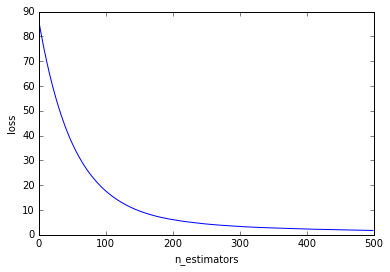

In [10]:
plt.plot(clf.train_score_)
plt.xlabel('n_estimators')
plt.ylabel('loss')
plt.show()

In [11]:
def staged_error_function(staged_preds, y_true, axis=1):
    """
    :param axis: 0 for row, 1 for column
    """
    return np.mean(np.abs(staged_preds - y_true), axis=axis)

In [12]:
X_test = pickle.load(open('X_test.pkl', 'rb'))
y_test = pickle.load(open('y_test.pkl', 'rb'))

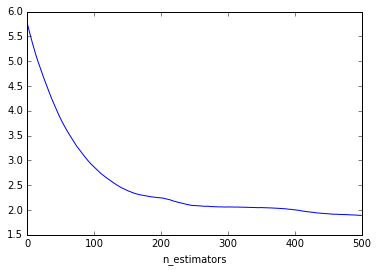

In [14]:
staged_preds = np.array(list(clf.staged_predict(X_test)))
staged_errors = staged_error_function(staged_preds, y_test, axis=1)

plt.plot(staged_errors)
plt.xlabel('n_estimators')
plt.ylabel('loss')
plt.show()

<font color="blue">
## 